In [1]:
# Cell 1: Install Required Libraries
print("Ensuring OpenCV, matplotlib, Pillow, and fer are installed...")

!pip install opencv-python matplotlib Pillow fer

print("\nInstallation complete. Proceed to next cell.")

Ensuring OpenCV, matplotlib, Pillow, and fer are installed...
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━


Installation complete. Proceed to next cell.


In [1]:
# Cell 2: Import Libraries, Download Haar Cascade, and Load Image

# Line 1: Import the OpenCV library
# This is our main toolkit for computer vision tasks, like reading images and finding faces.
import cv2

# Line 2: Import the Matplotlib plotting library
# We'll use this to display our image and draw rectangles and text on it.
import matplotlib.pyplot as plt

# Line 3: Import Matplotlib's patches module
# Specifically, this part of Matplotlib lets us draw shapes like rectangles on our plot.
import matplotlib.patches as patches

# Line 4: Import the Pillow (PIL) library
# Pillow helps us work with images, especially for opening and sometimes for display.
from PIL import Image

# Line 5: Import the NumPy library
# NumPy is essential for working with numerical data in Python, especially arrays.
# Images are often represented as NumPy arrays, so it's super important here.
import numpy as np

# Line 6: Import the time library
# We'll use this to measure how long our face and emotion detection process takes.
import time

# Line 7: Import the 'files' module from Google Colab
# This is a special Colab-specific tool that lets us easily upload files (like our image)
# directly from our computer into the Colab environment.
from google.colab import files

# Line 8: Import the 'os' (operating system) module
# We use this to interact with the computer's file system, like checking if a file already exists.
import os

# Line 9: Import the 'operator' module
# This is a handy tool we'll use later to easily find the emotion with the highest score.
import operator

# Line 10: Import the FER (Face Emotion Recognition) detector class
# This is the specific tool that will help us analyze emotions.
from fer import FER

print("Importing libraries and preparing...") # Just a helpful message to let us know what's happening.

# --- Download Haar Cascade XML file ---
# Line 11: Define the URL for the Haar Cascade XML file
# This is the web address where we can download the pre-trained model for face detection.
haar_cascade_url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
# Line 12: Define the filename we'll save the Haar Cascade model as
haar_cascade_filename = 'haarcascade_frontalface_default.xml'

print(f"Downloading Haar Cascade file: {haar_cascade_filename}...") # Another helpful message.

# Line 13: Check if the Haar Cascade file already exists
# We use 'os.path.exists()' to see if we've downloaded this file before.
if not os.path.exists(haar_cascade_filename):
    # Line 14: If the file doesn't exist, download it using 'wget'
    # '!wget' is a command line tool that downloads files from the internet.
    # '-O' tells it to save the file with the specified filename.
    !wget {haar_cascade_url} -O {haar_cascade_filename}
    print("Download complete.") # Confirmation message.
else:
    print("Haar Cascade file already exists.") # Message if we don't need to download again.


# --- Upload your image ---
print("\nUploading your image...") # Prompt for the user to upload their image.

# Line 15: Open the file upload dialog
# This command from Google Colab's 'files' module will pop up a window,
# allowing you to select an image file from your computer to upload to Colab.
uploaded = files.upload()

# Line 16: Get the name of the uploaded file
# Once you upload a file, it's stored in the 'uploaded' variable. This line extracts
# the actual filename (e.g., 'my_picture.jpg') so we can use it.
image_filename = next(iter(uploaded))

# --- Load the image ---
# Line 17: Read the image into our program using OpenCV
# 'cv2.imread()' opens the image file. OpenCV reads images as a NumPy array,
# but it uses a color order called BGR (Blue, Green, Red) by default.
img_bgr = cv2.imread(image_filename)

# Line 18: Check if the image was loaded successfully
# Sometimes, if the file path is wrong or the file is corrupted, 'cv2.imread' might return 'None'.
# This check prevents errors later if the image didn't load.
if img_bgr is None:
    print(f"Error: Could not load image from {image_filename}. Check file path.")
else:
    # Line 19: Convert the image from BGR to RGB
    # Matplotlib, which we'll use for displaying, expects images in RGB (Red, Green, Blue) format.
    # This line converts it so the colors look correct when we show the image.
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Line 20: Get the height, width, and number of color channels of the image
    # The 'shape' attribute of a NumPy array (which our image is) tells us its dimensions.
    # We unpack it into 'height', 'width', and '_' (we don't need the channel info here).
    height, width, _ = img_rgb.shape

    # Line 21: Set a base width for our plot's figure
    # This helps control how large the image appears when plotted.
    fig_width = 15

    # Line 22: Calculate the proportional height for our plot's figure
    # We calculate the height to match the image's original aspect ratio (width-to-height ratio).
    # This prevents the image from looking stretched or squashed on the plot.
    fig_height = fig_width * (height / width)

    print(f"Image '{image_filename}' loaded. Dimensions: {width}x{height}") # Confirmation message.

  if event.key is 'enter':



Importing libraries and preparing...
--2025-06-05 05:28:58--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.06s   

2025-06-05 05:28:58 (15.9 MB/s) - ‘haarcascade_frontalface_default.xml’ saved [930127/930127]

Download complete.

Uploading your image...


Saving 1bd4a878-102c-44aa-a17a-766cc6c2dc34.jfif to 1bd4a878-102c-44aa-a17a-766cc6c2dc34.jfif
Image '1bd4a878-102c-44aa-a17a-766cc6c2dc34.jfif' loaded. Dimensions: 1600x1200



Initializing detectors and performing detection...

--- Detected Faces & Emotions ---
  Face found at X: 1307, Y: 65, Width: 57, Height: 57
  No emotion detected for face at X:1307, Y:65.
  Face found at X: 486, Y: 223, Width: 75, Height: 75
  Face found at X: 621, Y: 201, Width: 81, Height: 81
  Face found at X: 751, Y: 197, Width: 88, Height: 88
  Face found at X: 377, Y: 255, Width: 86, Height: 86
  Face found at X: 960, Y: 252, Width: 93, Height: 93
  Face found at X: 65, Y: 283, Width: 105, Height: 105
  Face found at X: 384, Y: 336, Width: 58, Height: 58
  No emotion detected for face at X:384, Y:336.
  Face found at X: 1150, Y: 306, Width: 106, Height: 106
  Face found at X: 268, Y: 322, Width: 100, Height: 100
  Face found at X: 1311, Y: 342, Width: 111, Height: 111
  Face found at X: 923, Y: 968, Width: 39, Height: 39
  No emotion detected for face at X:923, Y:968.

Initializing detectors and performing detection...

--- Detected Faces & Emotions ---
  Face found at X: 1307, 

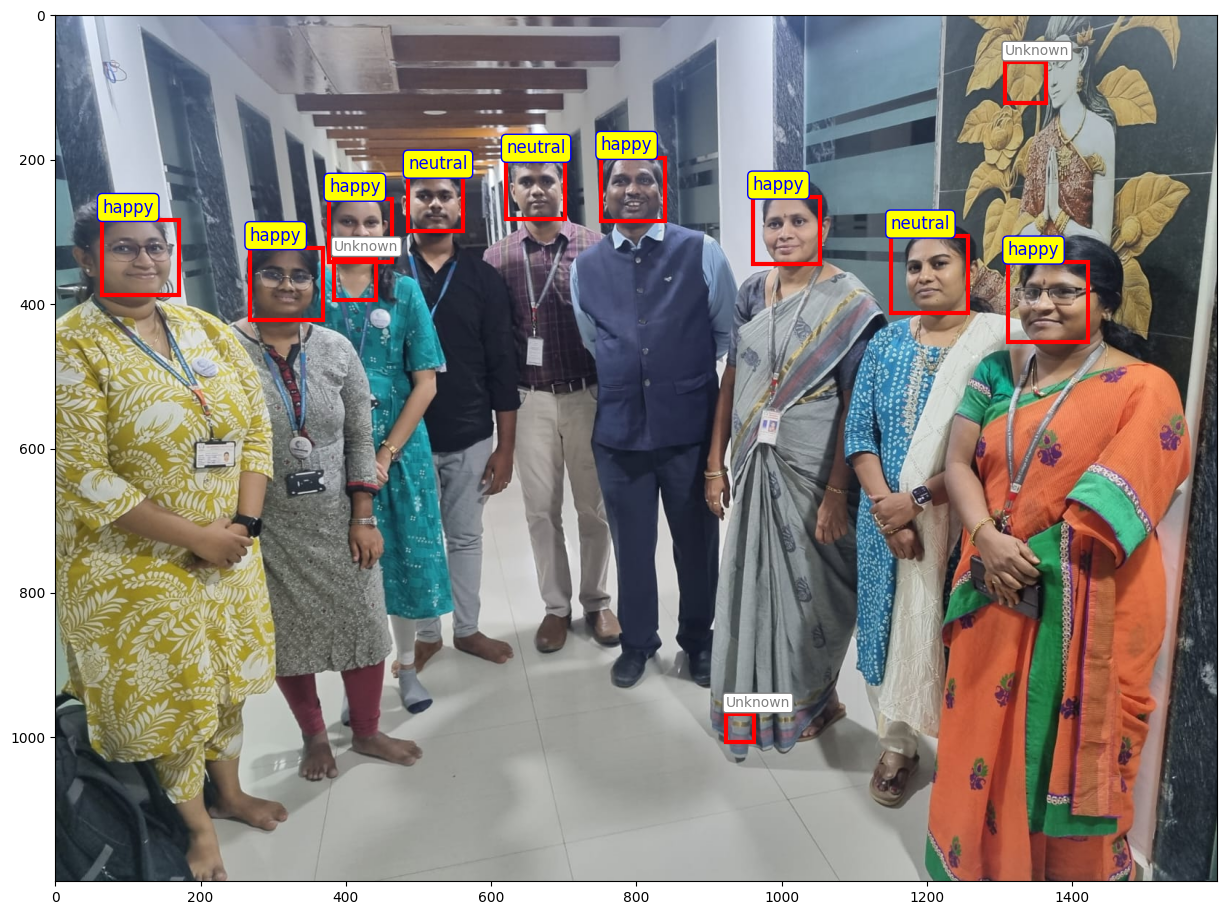

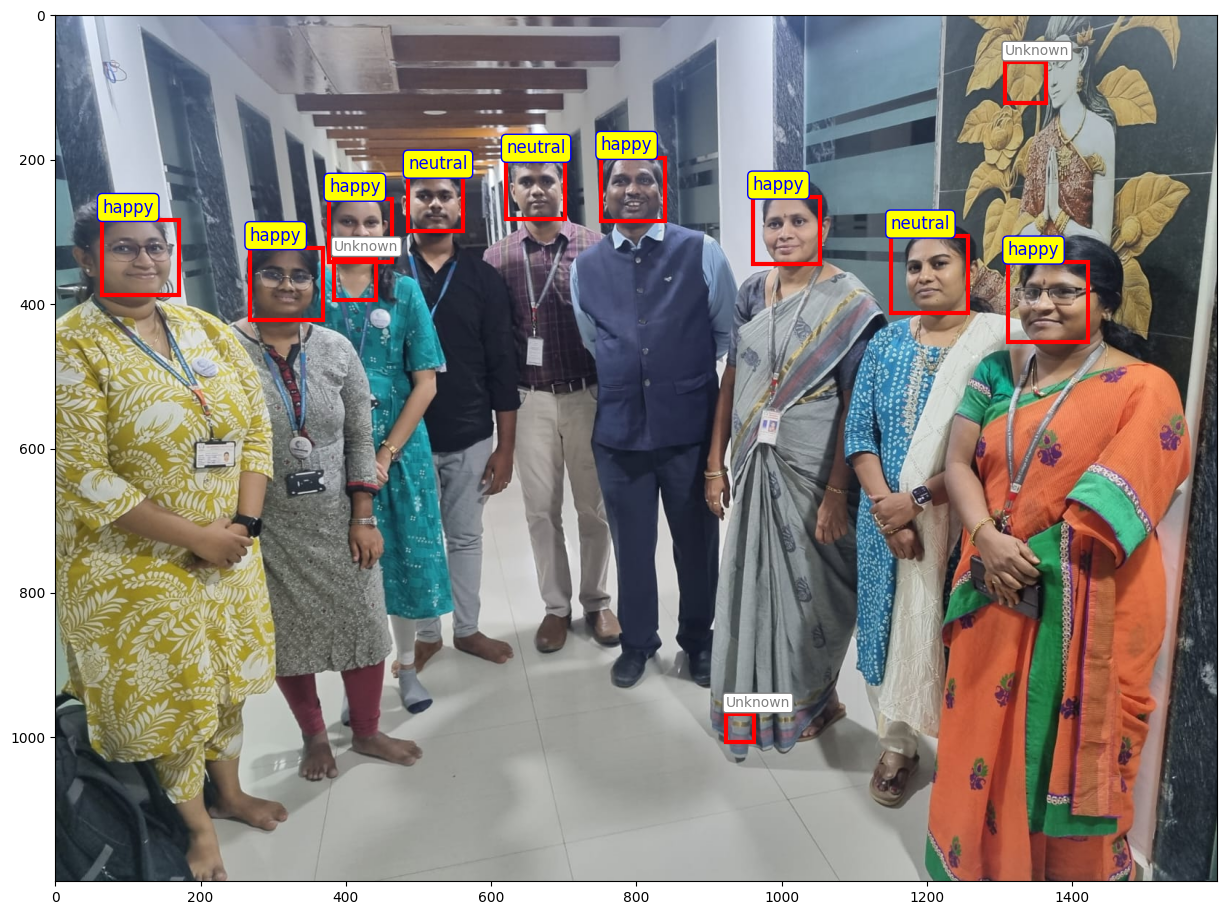

In [3]:
# Cell 3: Face Detection, Emotion Detection, and Plotting

print("\nInitializing detectors and performing detection...")

# Line 1: Initialize the Haar Cascade classifier for face detection
# Think of this as loading a special "face-finding map" into our program.
# This map tells OpenCV exactly what features to look for to spot a face.
face_cascade = cv2.CascadeClassifier(haar_cascade_filename)

# Line 2: Initialize the FER (Face Emotion Recognition) detector
# This loads another smart tool, specifically designed to read emotions from faces.
# We set 'mtcnn=False' because we're already finding faces with our 'face_cascade'.
# This tells FER, "Don't bother finding faces yourself; I'll give them to you!"
emotion_detector = FER(mtcnn=False)

# Line 3: Mark the starting time
# We're just setting a stopwatch here to see how long our entire process takes.
start = time.time()

# --- 1. Face Detection using OpenCV Haar Cascade ---
# Line 4: Convert the image to grayscale
# Imagine taking a color photo and making it black and white. Why?
# Because our 'face_cascade' (the face-finding map) works much faster and more efficiently
# when it only has to worry about shades of gray, not millions of colors.
gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Line 5: Detect faces! This is the core face-finding step.
# We're giving our grayscale image to the 'face_cascade' and asking it to find all faces.
# The numbers (1.1, 5, (30, 30)) are like sensitivity settings:
#   - 1.1: How much to shrink the image each time it looks for faces (smaller means more thorough, but slower).
#   - 5: How many times a potential face region needs to be seen to be counted as a real face (helps avoid false alarms).
#   - (30, 30): The smallest face size (in pixels) we're willing to detect. Anything smaller is ignored.
# 'faces' will become a list of rectangles, each one describing a face's position (x, y, width, height).
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# --- Setup Plot ---
# Line 6: Prepare a place to draw our image and the results
# This creates a blank canvas (called a 'figure') and a drawing area ('axes') for our picture.
# 'figsize' sets the size of this canvas, making sure our image isn't tiny or huge.
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
# Line 7: Display the original color image on our drawing area
# We're putting our actual picture onto the canvas. 'aspect='auto'' helps it fit nicely.
ax.imshow(img_rgb, aspect='auto')

print("\n--- Detected Faces & Emotions ---")
# Line 8: Keep a count of how many emotions we successfully detect
detected_emotions_count = 0

# Line 9: Set a padding for extracting face images
# When we cut out a face to analyze its emotion, we want to grab a little extra space
# around it (like a border) so the emotion detector has more context. '20' pixels in this case.
padding_boundary = 20

# Line 10: Loop through each detected face
# Now, we're going through each 'face' that our 'face_cascade' found, one by one.
# For each face, 'x', 'y', 'w', and 'h' tell us its top-left corner (x,y) and its width (w) and height (h).
for (x, y, w, h) in faces:
    # Line 11: Convert OpenCV coordinates to (top, right, bottom, left)
    # The 'face_recognition' library often uses this format, and it's also clear for drawing.
    # 'y' is 'top', 'x + w' is 'right', 'y + h' is 'bottom', and 'x' is 'left'.
    top, right, bottom, left = y, x + w, y + h, x

    print(f"  Face found at X: {x}, Y: {y}, Width: {w}, Height: {h}")

    # Line 12: Draw a red rectangle around the face
    # We're creating a rectangle object using the (left, top) corner, width, and height.
    # 'linewidth' is how thick the line is, 'edgecolor='r'' makes it red, and 'facecolor='none'' means it's just an outline.
    rect = patches.Rectangle((left, top), (right - left), (bottom - top),
                             linewidth=3, edgecolor='r', facecolor='none')
    # Line 13: Add the rectangle to our drawing area ('ax')
    ax.add_patch(rect)

    # --- 2. Extract Face Image for Emotion Detection ---
    # Line 14: Calculate the starting Y-coordinate for slicing the face image
    # We take 'y' (top of the face) and subtract 'padding_boundary'.
    # 'max(0, ...)' makes sure we don't go below 0 (the top edge of the image).
    y_start = max(0, y - padding_boundary)
    # Line 15: Calculate the ending Y-coordinate for slicing the face image
    # We take 'y + h' (bottom of the face) and add 'padding_boundary'.
    # 'min(img_bgr.shape[0], ...)' makes sure we don't go beyond the image's total height.
    y_end = min(img_bgr.shape[0], y + h + padding_boundary)
    # Line 16: Calculate the starting X-coordinate for slicing the face image
    # Similar to y_start, but for the left edge.
    x_start = max(0, x - padding_boundary)
    # Line 17: Calculate the ending X-coordinate for slicing the face image
    # Similar to y_end, but for the right edge.
    x_end = min(img_bgr.shape[1], x + w + padding_boundary)

    # Line 18: Slice the image to get just the face (with padding)
    # This creates a smaller image containing only the detected face region.
    # We're using 'img_bgr' here because it's the original image loaded by OpenCV.
    face_image_for_emotion = img_bgr[y_start:y_end, x_start:x_end]

    # --- 3. Perform Emotion Detection ---
    # Line 19: Check if the sliced face image is not empty
    # Sometimes, if a face is at the very edge of the image, the slicing might result in an empty area.
    # This check prevents errors if that happens.
    if face_image_for_emotion.size > 0:
        # Line 20: Convert the sliced face image to RGB
        # Our 'fer' emotion detector often works best with RGB images, so we convert it.
        face_image_rgb = cv2.cvtColor(face_image_for_emotion, cv2.COLOR_BGR2RGB)

        # Line 21: Detect emotions in this extracted face image
        # We give the small RGB face image to our 'emotion_detector'.
        # It processes it and gives us back information about the emotions it found.
        # This 'emotions_data' will be a list of dictionaries.
        emotions_data = emotion_detector.detect_emotions(face_image_rgb)

        # Line 22: Check if any emotions were actually detected for this face
        # If 'emotions_data' is not empty, it means FER successfully found emotions.
        if emotions_data:
            # Line 23: Get the emotion scores for the first face detected in the slice
            # If FER found multiple faces in our small slice (unlikely but possible),
            # 'emotions_data[0]' gives us the first one's emotion scores (e.g., 'happy': 0.9, 'sad': 0.1).
            emotion_scores = emotions_data[0]['emotions']
            # Line 24: Find the emotion with the highest score
            # 'max(...)' finds the item with the biggest number (the highest score).
            # 'operator.itemgetter(1)' tells it to look at the *second* part of each item (the score itself).
            # '[0]' then picks out the emotion name (like 'happy').
            emotion = max(emotion_scores.items(), key=operator.itemgetter(1))[0]
            # Line 25: Increment our counter for detected emotions
            detected_emotions_count += 1

            # Line 26: Plot the emotion text above the face
            # 'plt.text' draws text on our image.
            #   - 'x, y - 10': Places the text slightly above the top-left corner of the face.
            #   - 'fontsize', 'color': Self-explanatory.
            #   - 'bbox': Creates a nice colored box behind the text, making it easier to read.
            plt.text(x, y - 10, emotion, fontsize=12, color='blue',
                     bbox=dict(facecolor='yellow', edgecolor='blue', boxstyle='round,pad=0.3'))
        else:
            # Line 27: If no emotion was confidently detected, print a message and draw "Unknown"
            print(f"  No emotion detected for face at X:{x}, Y:{y}.")
            plt.text(x, y - 10, "Unknown", fontsize=10, color='gray',
                     bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.2'))
# Cell 3: Face Detection, Emotion Detection, and Plotting

print("\nInitializing detectors and performing detection...")

# Line 1: Initialize the Haar Cascade classifier for face detection
# Think of this as loading a special "face-finding map" into our program.
# This map tells OpenCV exactly what features to look for to spot a face.
face_cascade = cv2.CascadeClassifier(haar_cascade_filename)

# Line 2: Initialize the FER (Face Emotion Recognition) detector
# This loads another smart tool, specifically designed to read emotions from faces.
# We set 'mtcnn=False' because we're already finding faces with our 'face_cascade'.
# This tells FER, "Don't bother finding faces yourself; I'll give them to you!"
emotion_detector = FER(mtcnn=False)

# Line 3: Mark the starting time
# We're just setting a stopwatch here to see how long our entire process takes.
start = time.time()

# --- 1. Face Detection using OpenCV Haar Cascade ---
# Line 4: Convert the image to grayscale
# Imagine taking a color photo and making it black and white. Why?
# Because our 'face_cascade' (the face-finding map) works much faster and more efficiently
# when it only has to worry about shades of gray, not millions of colors.
gray_image = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# Line 5: Detect faces! This is the core face-finding step.
# We're giving our grayscale image to the 'face_cascade' and asking it to find all faces.
# The numbers (1.1, 5, (30, 30)) are like sensitivity settings:
#   - 1.1: How much to shrink the image each time it looks for faces (smaller means more thorough, but slower).
#   - 5: How many times a potential face region needs to be seen to be counted as a real face (helps avoid false alarms).
#   - (30, 30): The smallest face size (in pixels) we're willing to detect. Anything smaller is ignored.
# 'faces' will become a list of rectangles, each one describing a face's position (x, y, width, height).
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# --- Setup Plot ---
# Line 6: Prepare a place to draw our image and the results
# This creates a blank canvas (called a 'figure') and a drawing area ('axes') for our picture.
# 'figsize' sets the size of this canvas, making sure our image isn't tiny or huge.
fig, ax = plt.subplots(figsize=(fig_width, fig_height))
# Line 7: Display the original color image on our drawing area
# We're putting our actual picture onto the canvas. 'aspect='auto'' helps it fit nicely.
ax.imshow(img_rgb, aspect='auto')

print("\n--- Detected Faces & Emotions ---")
# Line 8: Keep a count of how many emotions we successfully detect
detected_emotions_count = 0

# Line 9: Set a padding for extracting face images
# When we cut out a face to analyze its emotion, we want to grab a little extra space
# around it (like a border) so the emotion detector has more context. '20' pixels in this case.
padding_boundary = 20

# Line 10: Loop through each detected face
# Now, we're going through each 'face' that our 'face_cascade' found, one by one.
# For each face, 'x', 'y', 'w', and 'h' tell us its top-left corner (x,y) and its width (w) and height (h).
for (x, y, w, h) in faces:
    # Line 11: Convert OpenCV coordinates to (top, right, bottom, left)
    # The 'face_recognition' library often uses this format, and it's also clear for drawing.
    # 'y' is 'top', 'x + w' is 'right', 'y + h' is 'bottom', and 'x' is 'left'.
    top, right, bottom, left = y, x + w, y + h, x

    print(f"  Face found at X: {x}, Y: {y}, Width: {w}, Height: {h}")

    # Line 12: Draw a red rectangle around the face
    # We're creating a rectangle object using the (left, top) corner, width, and height.
    # 'linewidth' is how thick the line is, 'edgecolor='r'' makes it red, and 'facecolor='none'' means it's just an outline.
    rect = patches.Rectangle((left, top), (right - left), (bottom - top),
                             linewidth=3, edgecolor='r', facecolor='none')
    # Line 13: Add the rectangle to our drawing area ('ax')
    ax.add_patch(rect)

    # --- 2. Extract Face Image for Emotion Detection ---
    # Line 14: Calculate the starting Y-coordinate for slicing the face image
    # We take 'y' (top of the face) and subtract 'padding_boundary'.
    # 'max(0, ...)' makes sure we don't go below 0 (the top edge of the image).
    y_start = max(0, y - padding_boundary)
    # Line 15: Calculate the ending Y-coordinate for slicing the face image
    # We take 'y + h' (bottom of the face) and add 'padding_boundary'.
    # 'min(img_bgr.shape[0], ...)' makes sure we don't go beyond the image's total height.
    y_end = min(img_bgr.shape[0], y + h + padding_boundary)
    # Line 16: Calculate the starting X-coordinate for slicing the face image
    # Similar to y_start, but for the left edge.
    x_start = max(0, x - padding_boundary)
    # Line 17: Calculate the ending X-coordinate for slicing the face image
    # Similar to y_end, but for the right edge.
    x_end = min(img_bgr.shape[1], x + w + padding_boundary)

    # Line 18: Slice the image to get just the face (with padding)
    # This creates a smaller image containing only the detected face region.
    # We're using 'img_bgr' here because it's the original image loaded by OpenCV.
    face_image_for_emotion = img_bgr[y_start:y_end, x_start:x_end]

    # --- 3. Perform Emotion Detection ---
    # Line 19: Check if the sliced face image is not empty
    # Sometimes, if a face is at the very edge of the image, the slicing might result in an empty area.
    # This check prevents errors if that happens.
    if face_image_for_emotion.size > 0:
        # Line 20: Convert the sliced face image to RGB
        # Our 'fer' emotion detector often works best with RGB images, so we convert it.
        face_image_rgb = cv2.cvtColor(face_image_for_emotion, cv2.COLOR_BGR2RGB)

        # Line 21: Detect emotions in this extracted face image
        # We give the small RGB face image to our 'emotion_detector'.
        # It processes it and gives us back information about the emotions it found.
        # This 'emotions_data' will be a list of dictionaries.
        emotions_data = emotion_detector.detect_emotions(face_image_rgb)

        # Line 22: Check if any emotions were actually detected for this face
        # If 'emotions_data' is not empty, it means FER successfully found emotions.
        if emotions_data:
            # Line 23: Get the emotion scores for the first face detected in the slice
            # If FER found multiple faces in our small slice (unlikely but possible),
            # 'emotions_data[0]' gives us the first one's emotion scores (e.g., 'happy': 0.9, 'sad': 0.1).
            emotion_scores = emotions_data[0]['emotions']
            # Line 24: Find the emotion with the highest score
            # 'max(...)' finds the item with the biggest number (the highest score).
            # 'operator.itemgetter(1)' tells it to look at the *second* part of each item (the score itself).
            # '[0]' then picks out the emotion name (like 'happy').
            emotion = max(emotion_scores.items(), key=operator.itemgetter(1))[0]
            # Line 25: Increment our counter for detected emotions
            detected_emotions_count += 1

            # Line 26: Plot the emotion text above the face
            # 'plt.text' draws text on our image.
            #   - 'x, y - 10': Places the text slightly above the top-left corner of the face.
            #   - 'fontsize', 'color': Self-explanatory.
            #   - 'bbox': Creates a nice colored box behind the text, making it easier to read.
            plt.text(x, y - 10, emotion, fontsize=12, color='blue',
                     bbox=dict(facecolor='yellow', edgecolor='blue', boxstyle='round,pad=0.3'))
        else:
            # Line 27: If no emotion was confidently detected, print a message and draw "Unknown"
            print(f"  No emotion detected for face at X:{x}, Y:{y}.")
            plt.text(x, y - 10, "Unknown", fontsize=10, color='gray',
                     bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.2'))
    else:
        # Line 28: If the sliced face image was empty, print a warning
        print(f"  Warning: Sliced face image at X:{x}, Y:{y} was empty.")